In [33]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline


ls ../data/

df = sqlContext.read.format("com.databricks.spark.csv").load('../data/train.csv')

df.show(2)


```bash
set header to databricks csv header to true.

```

df = sqlContext.read.format("com.databricks.spark.csv").options(header=True,inferschema=True).load('../data/train.csv')

df.printSchema()

df = df.coalesce(5)
df.write.parquet("../data/train1")

In [34]:
df = sqlContext.read.parquet("../data/train1/*.parquet")

In [35]:
df = df.cache()
df.count()

37670293

In [36]:
df.count()

37670293

In [37]:
pandasdf = df.select("hotel_continent").groupBy("hotel_continent").count().toPandas()
df.select("hotel_continent").groupBy("hotel_continent").count().show()

+---------------+--------+
|hotel_continent|   count|
+---------------+--------+
|              0|  712270|
|              1|     214|
|              2|19777647|
|              3| 4895159|
|              4| 4339118|
|              5|  373841|
|              6| 7572044|
+---------------+--------+



In [38]:
pandasdf

,hotel_continent,count
0,0,712270
1,1,214
2,2,19777647
3,3,4895159
4,4,4339118
5,5,373841
6,6,7572044


```bash
is_booking 
Values : 1,0
1- Booked 
0- Searched

```

In [39]:
df.select("hotel_continent","is_booking").show(20)

+---------------+----------+
|hotel_continent|is_booking|
+---------------+----------+
|              2|         0|
|              2|         1|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
+---------------+----------+
only showing top 20 rows



### Plotting continents based on searches and bookings.
```bash
Findings: Continent 2 has most activity.
```

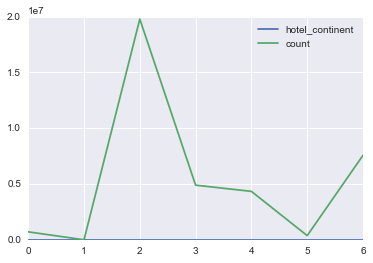

In [40]:
pandasdf.plot()

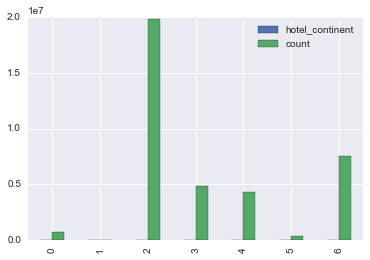

In [41]:
pandasdf.plot(kind='bar')

In [42]:
temppandas = df.select("hotel_continent","is_booking").groupBy("hotel_continent","is_booking").count().toPandas()
df.select("hotel_continent","is_booking").groupBy("hotel_continent","is_booking").count().show()

+---------------+----------+--------+
|hotel_continent|is_booking|   count|
+---------------+----------+--------+
|              4|         0| 4137269|
|              4|         1|  201849|
|              5|         0|  346240|
|              5|         1|   27601|
|              0|         0|  658454|
|              0|         1|   53816|
|              6|         0| 6987327|
|              6|         1|  584717|
|              1|         0|     203|
|              1|         1|      11|
|              2|         0|17964364|
|              2|         1| 1813283|
|              3|         0| 4575743|
|              3|         1|  319416|
+---------------+----------+--------+



### Plotting continent count based on searches , 0 denotes search.

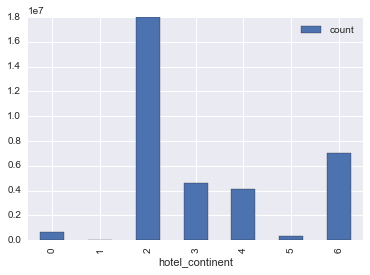

In [43]:
temppandas1 = temppandas[temppandas.is_booking==0]
temppandas1[['hotel_continent','count']].sort_values(by='hotel_continent').plot(x='hotel_continent',xlim=[0,6],kind='bar')

### Plotting continent count based on booking , 1 denotes booking

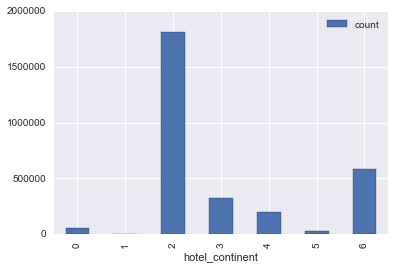

In [44]:
temppandas1 = temppandas[temppandas.is_booking==1]
temppandas1[['hotel_continent','count']].sort_values(by='hotel_continent').plot(x='hotel_continent',xlim=[0,6],kind='bar')

### Distinct hotel categories available

In [45]:
df.select("hotel_cluster").distinct().count()

100

### Exploring posa_continent : 	"ID of continent associated with site_name "

In [46]:
df.select("posa_continent").distinct().show()

+--------------+
|posa_continent|
+--------------+
|             0|
|             1|
|             2|
|             3|
|             4|
+--------------+



In [47]:
tempPandas = (df
              .select("posa_continent","is_booking","cnt")
              .groupBy("posa_continent","is_booking")
              .agg({'is_booking':'count','cnt':'sum'})).toPandas()
(df
 .select("posa_continent","is_booking","cnt")
 .groupBy("posa_continent","is_booking")
 .agg({'is_booking':'count','cnt':'sum'})
 .show())

+--------------+----------+--------+-----------------+
|posa_continent|is_booking|sum(cnt)|count(is_booking)|
+--------------+----------+--------+-----------------+
|             4|         0| 1613037|          1110181|
|             4|         1|   81859|            80545|
|             0|         0|  379108|           246563|
|             0|         1|   19065|            18547|
|             1|         0| 6322205|          4107420|
|             1|         1|  355367|           350656|
|             2|         0| 5296666|          3307719|
|             2|         1|  213919|           208200|
|             3|         0|39222013|         25897717|
|             3|         1| 2376268|          2342745|
+--------------+----------+--------+-----------------+



In [48]:
tempPandas

,posa_continent,is_booking,sum(cnt),count(is_booking)
0,4,0,1613037,1110181
1,4,1,81859,80545
2,0,0,379108,246563
3,0,1,19065,18547
4,1,0,6322205,4107420
5,1,1,355367,350656
6,2,0,5296666,3307719
7,2,1,213919,208200
8,3,0,39222013,25897717
9,3,1,2376268,2342745


In [49]:
tempPandas0 = tempPandas[tempPandas.is_booking == 0]
tempPandas0

,posa_continent,is_booking,sum(cnt),count(is_booking)
0,4,0,1613037,1110181
2,0,0,379108,246563
4,1,0,6322205,4107420
6,2,0,5296666,3307719
8,3,0,39222013,25897717


### It is observed that there is a huge number of bookings made from continent 3.

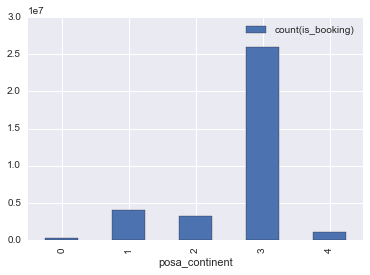

In [50]:
(tempPandas0[['posa_continent','count(is_booking)']]
 .sort_values(by='posa_continent')
 .plot(x='posa_continent',kind='bar',xlim=[0,6]))

In [51]:
tempPandas1 = tempPandas[tempPandas.is_booking == 0]
tempPandas1

,posa_continent,is_booking,sum(cnt),count(is_booking)
0,4,0,1613037,1110181
2,0,0,379108,246563
4,1,0,6322205,4107420
6,2,0,5296666,3307719
8,3,0,39222013,25897717


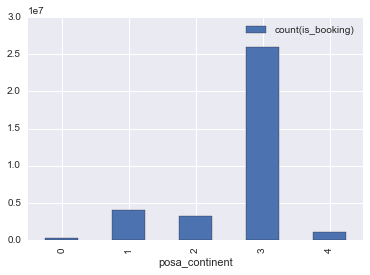

In [52]:
(tempPandas1[['posa_continent','count(is_booking)']]
 .sort_values(by='posa_continent')
 .plot(x='posa_continent',kind='bar',xlim=[0,6]))

In [53]:
tempPandas

,posa_continent,is_booking,sum(cnt),count(is_booking)
0,4,0,1613037,1110181
1,4,1,81859,80545
2,0,0,379108,246563
3,0,1,19065,18547
4,1,0,6322205,4107420
5,1,1,355367,350656
6,2,0,5296666,3307719
7,2,1,213919,208200
8,3,0,39222013,25897717
9,3,1,2376268,2342745


In [54]:
df.printSchema()

root
 |-- date_time: timestamp (nullable = true)
 |-- site_name: integer (nullable = true)
 |-- posa_continent: integer (nullable = true)
 |-- user_location_country: integer (nullable = true)
 |-- user_location_region: integer (nullable = true)
 |-- user_location_city: integer (nullable = true)
 |-- orig_destination_distance: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- is_mobile: integer (nullable = true)
 |-- is_package: integer (nullable = true)
 |-- channel: integer (nullable = true)
 |-- srch_ci: string (nullable = true)
 |-- srch_co: string (nullable = true)
 |-- srch_adults_cnt: integer (nullable = true)
 |-- srch_children_cnt: integer (nullable = true)
 |-- srch_rm_cnt: integer (nullable = true)
 |-- srch_destination_id: integer (nullable = true)
 |-- srch_destination_type_id: integer (nullable = true)
 |-- is_booking: integer (nullable = true)
 |-- cnt: integer (nullable = true)
 |-- hotel_continent: integer (nullable = true)
 |-- hotel_country: intege

In [55]:
tempPandas = (df
              .select("posa_continent","is_booking","hotel_continent","cnt")
              .groupBy("posa_continent","hotel_continent","is_booking")
              .agg({'is_booking':'count','cnt':'sum'})).toPandas()
tempPandas.head()

,posa_continent,hotel_continent,is_booking,sum(cnt),count(is_booking)
0,1,2,0,1266732,829820
1,1,2,1,68238,67412
2,2,3,0,3328897,2072351
3,2,3,1,125924,122435
4,3,4,0,6402636,3862337


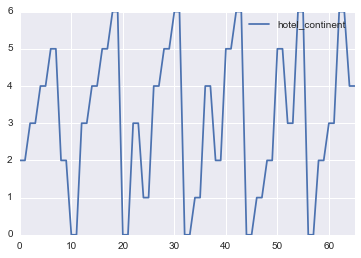

In [56]:
tempPandas.plot(y='hotel_continent')

In [57]:
tmp1 = df.sample(True,0.001).toPandas()


In [ ]:
tmp1.count()

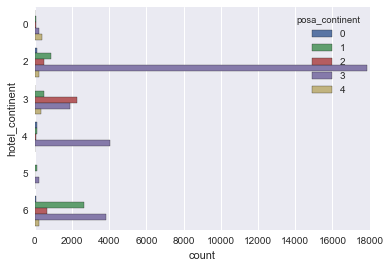

In [59]:
sns.countplot(y='hotel_continent',hue='posa_continent',data=tmp1)


In [60]:
df.printSchema()

root
 |-- date_time: timestamp (nullable = true)
 |-- site_name: integer (nullable = true)
 |-- posa_continent: integer (nullable = true)
 |-- user_location_country: integer (nullable = true)
 |-- user_location_region: integer (nullable = true)
 |-- user_location_city: integer (nullable = true)
 |-- orig_destination_distance: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- is_mobile: integer (nullable = true)
 |-- is_package: integer (nullable = true)
 |-- channel: integer (nullable = true)
 |-- srch_ci: string (nullable = true)
 |-- srch_co: string (nullable = true)
 |-- srch_adults_cnt: integer (nullable = true)
 |-- srch_children_cnt: integer (nullable = true)
 |-- srch_rm_cnt: integer (nullable = true)
 |-- srch_destination_id: integer (nullable = true)
 |-- srch_destination_type_id: integer (nullable = true)
 |-- is_booking: integer (nullable = true)
 |-- cnt: integer (nullable = true)
 |-- hotel_continent: integer (nullable = true)
 |-- hotel_country: intege

In [61]:
(df
 .select('posa_continent','hotel_continent','is_booking')
 .groupBy('posa_continent','hotel_continent','is_booking')
 .count()
 .show())

+--------------+---------------+----------+-------+
|posa_continent|hotel_continent|is_booking|  count|
+--------------+---------------+----------+-------+
|             1|              2|         0| 829820|
|             1|              2|         1|  67412|
|             2|              3|         0|2072351|
|             2|              3|         1| 122435|
|             3|              4|         0|3862337|
|             3|              4|         1| 181796|
|             4|              5|         0|   8134|
|             4|              5|         1|    734|
|             0|              2|         0|  99302|
|             0|              2|         1|   6984|
|             4|              0|         0| 319609|
|             4|              0|         1|  25361|
|             1|              3|         0| 488705|
|             1|              3|         1|  34666|
|             2|              4|         0|  34502|
|             2|              4|         1|   2821|
|           

In [62]:
temppandas = (df
 .select('posa_continent','hotel_continent','is_booking')
 .groupBy('posa_continent','hotel_continent','is_booking')
 .count()
 .toPandas()
 )

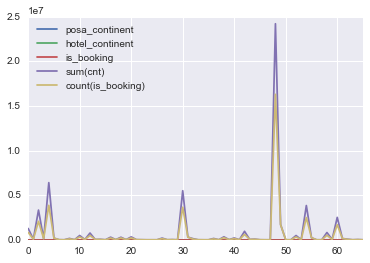

In [63]:
tempPandas.plot()


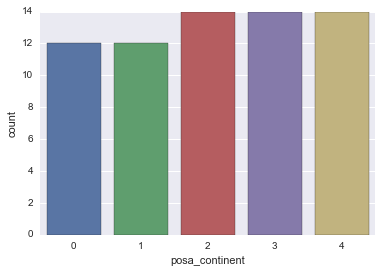

In [64]:
sns.countplot(x = 'posa_continent',data=tempPandas)

In [65]:
tempPandas

,posa_continent,hotel_continent,is_booking,sum(cnt),count(is_booking)
0,1,2,0,1266732,829820
1,1,2,1,68238,67412
2,2,3,0,3328897,2072351
3,2,3,1,125924,122435
4,3,4,0,6402636,3862337
5,3,4,1,185001,181796
6,4,5,0,11666,8134
7,4,5,1,743,734
8,0,2,0,154447,99302
9,0,2,1,7162,6984


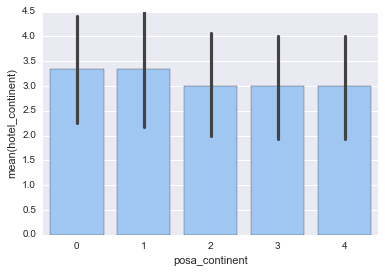

In [66]:
sns.set_color_codes("pastel")
sns.barplot(x="posa_continent", y="hotel_continent", data=tempPandas,
            label="Total", color="b")

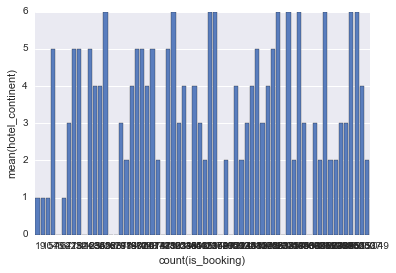

In [67]:
sns.set_color_codes("muted")
sns.barplot(x="count(is_booking)", y="hotel_continent", data=tempPandas,
            label="Alcohol-involved", color="b")


In [68]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()
p = figure()
p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)
show(p)

Loading BokehJS ...

In [71]:
df.select('site_name','posa_continent','user_location_country','srch_destination_id','hotel_country').describe().show()

+-------+------------------+------------------+---------------------+-------------------+-----------------+
|summary|         site_name|    posa_continent|user_location_country|srch_destination_id|    hotel_country|
+-------+------------------+------------------+---------------------+-------------------+-----------------+
|  count|          37670293|          37670293|             37670293|           37670293|         37670293|
|   mean| 9.795271329585889|2.6804730188851997|    86.10880194109454| 14441.090543760836|81.29685165974153|
| stddev|11.967543566513172|0.7480393482506555|    59.24310334784055| 11066.302332627416|56.17118806288662|
|    min|                 2|                 0|                    0|                  0|                0|
|    max|                53|                 4|                  239|              65107|              212|
+-------+------------------+------------------+---------------------+-------------------+-----------------+

